In [4]:
import numpy as np

import pandas as pd

import seaborn as sns

from matplotlib import pyplot as plt

### Assume situation that we want to buy a book, and we have to choose between 3 sellers who offer the same price, but have different ratings:
10 ratings -> 100% good
50 ratings -> 95% good
200 ratings -> 93% good
Which one should we choose?

#### Laplace's rule of succesion -> imagine, that we "stick" two more reviews
one positive
one negative
For example
<br> O O O O O O O O O O  |   O X

P(possitive experience) = success rate

In [5]:
def get_succession(rates):
    rates += [1, 0]
    return sum(rates) / len(rates)


var_1 = [1] * 10
display(get_succession(var_1))
var_2 = [1] * 48 + [0] * 2
display(get_succession(var_2))
var_3 = [1] * 186 + [0] * 200
display(get_succession(var_2))

0.9166666666666666

0.9423076923076923

0.9259259259259259

#### If someone has 100% ratings it does not neccesarliy mean that all of his future reviews will be good.
But we can calculate probabability of such situation
<br>
P(data | s)  -> Probability of that some set of rewievs appear given successrate (successrate is probability of positive review based on so-far-acquired, so just rating in % that appears on website)

### Let's simulate probability of having success rate that is presented on website (so successrate calculated based on so-far-acquired reviews)
### Plot number of positive reviews in population, check which value is most common

In [58]:
import random


def return_num_of_positive_reviews(success_rate, num_of_reviews):
    return sum(
        [
            rating < success_rate 
            for rating in [random.random() for _ in range(num_of_reviews)]
        ]
    )

true_most_common_values_for_experiment = {
    "1_10": 10,
    "0.95_50": 48,
    "0.93_200": 187
}

success_rates_from_website = (1, 0.95, 0.93)
num_of_reviews_from_website = (10, 50, 200)
experiment = {}
for num_of_simulations in 5 * np.logspace(1, 5, dtype=int, num=5):
    simulations_dict = {}
    for success_rate, num_of_reviews \
            in zip(success_rates_from_website, num_of_reviews_from_website):
        simulations = []
        for _ in range(num_of_simulations):
            simulations.append(return_num_of_positive_reviews(success_rate, num_of_reviews))
        simulations_dict[f"{success_rate}_{num_of_reviews}"] = simulations
    experiment[num_of_simulations] = simulations_dict

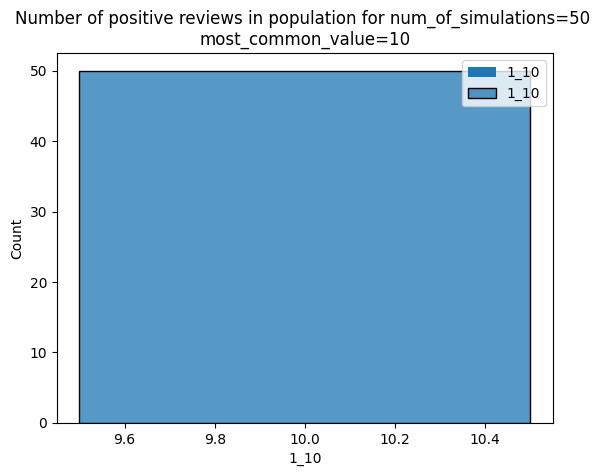

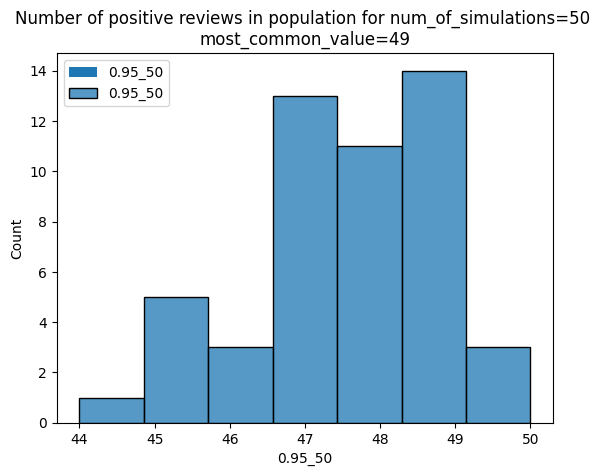

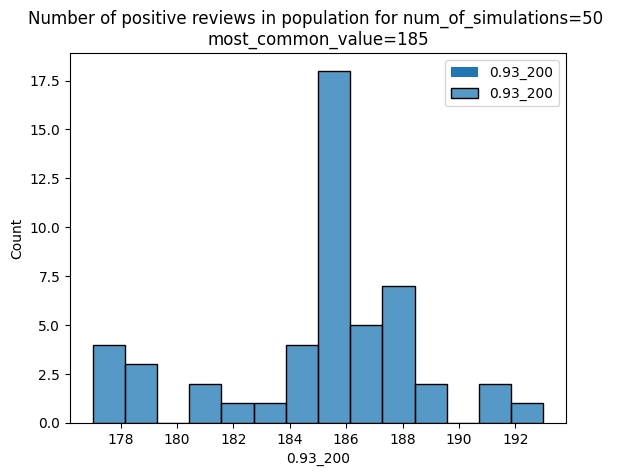

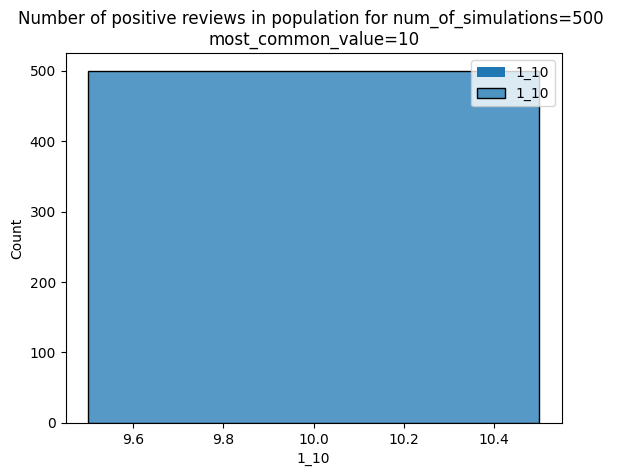

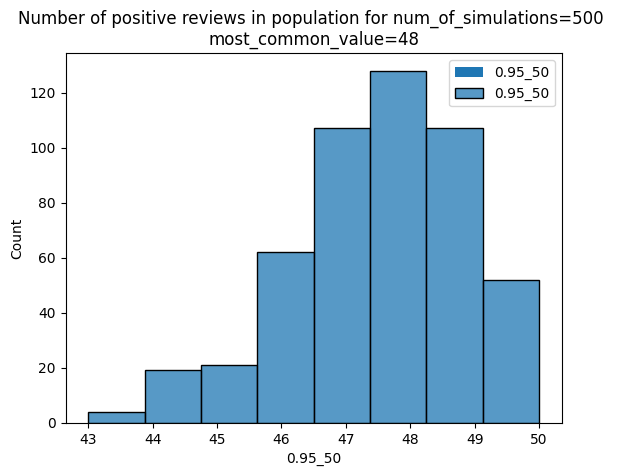

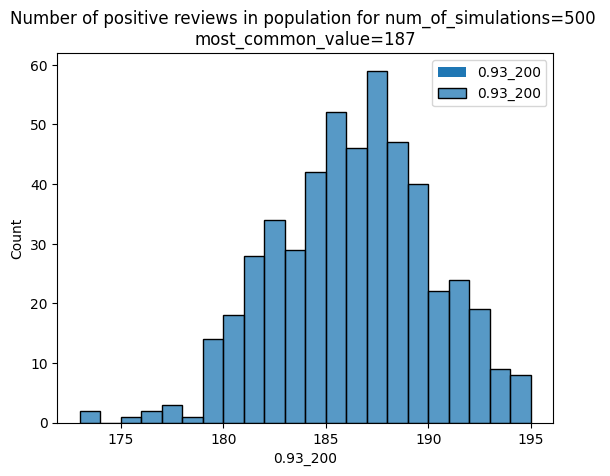

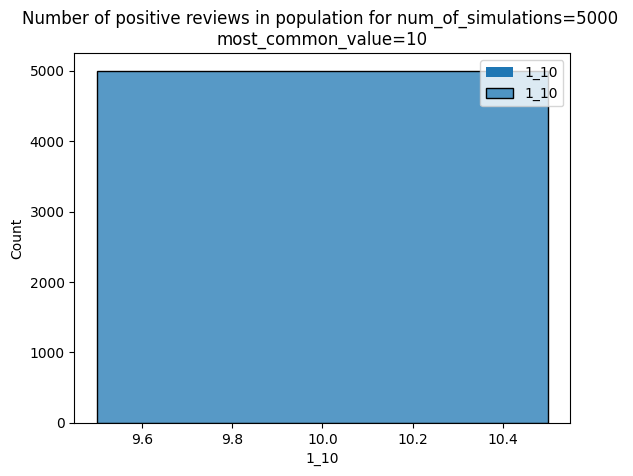

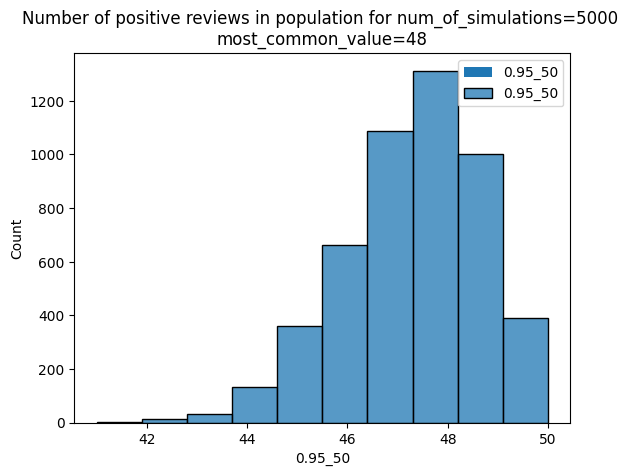

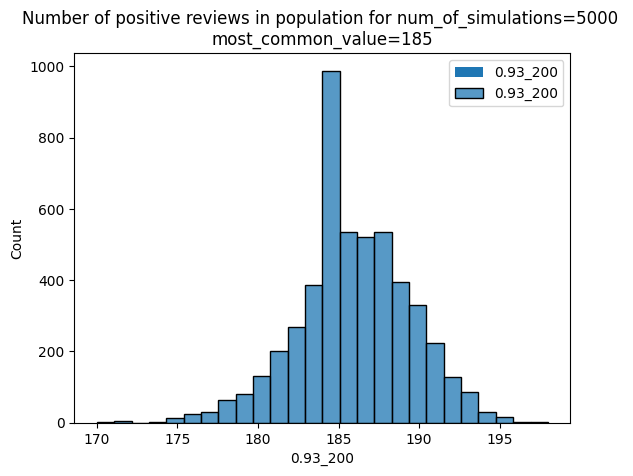

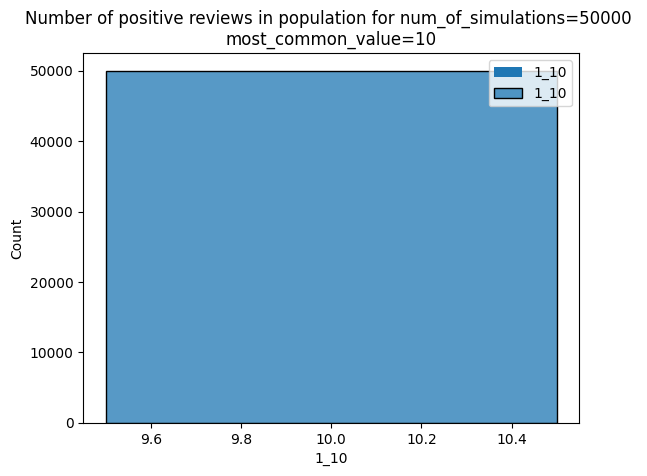

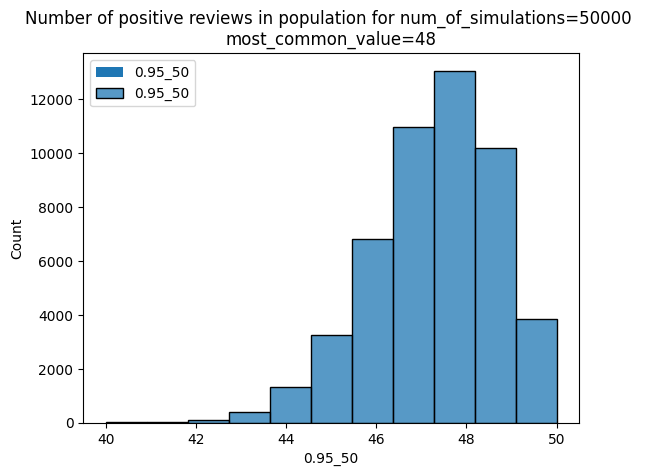

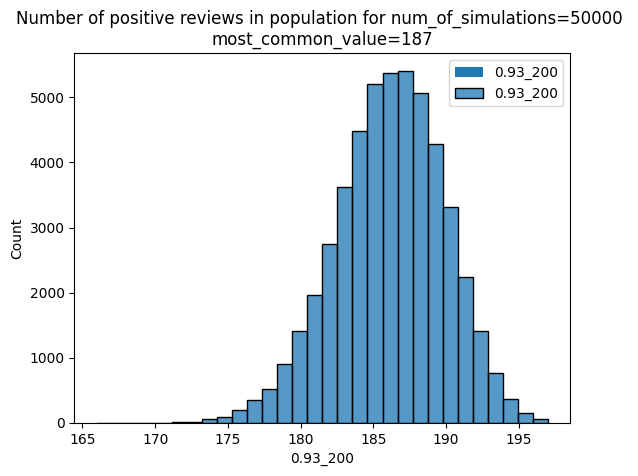

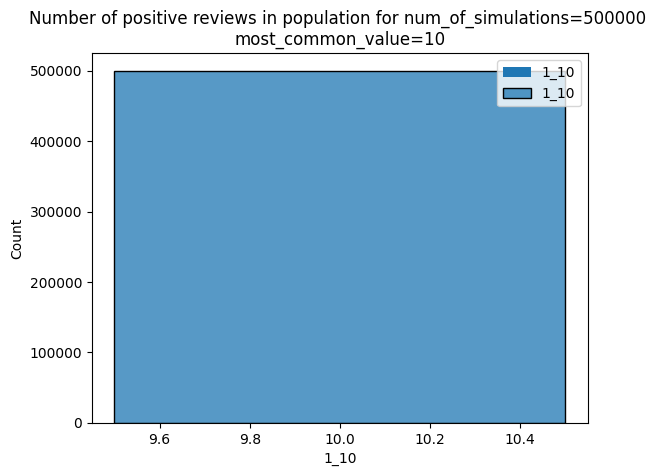

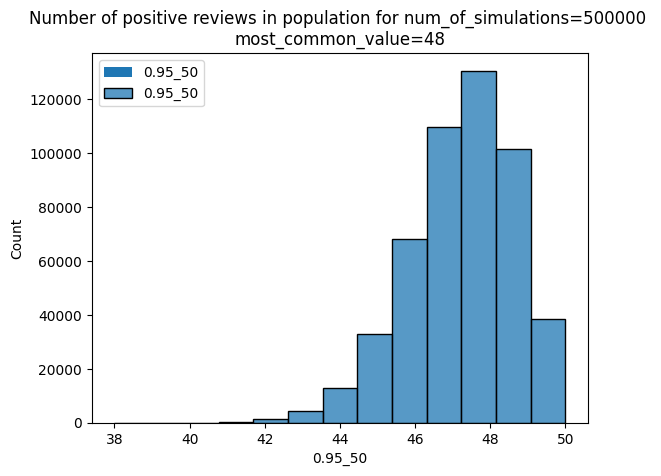

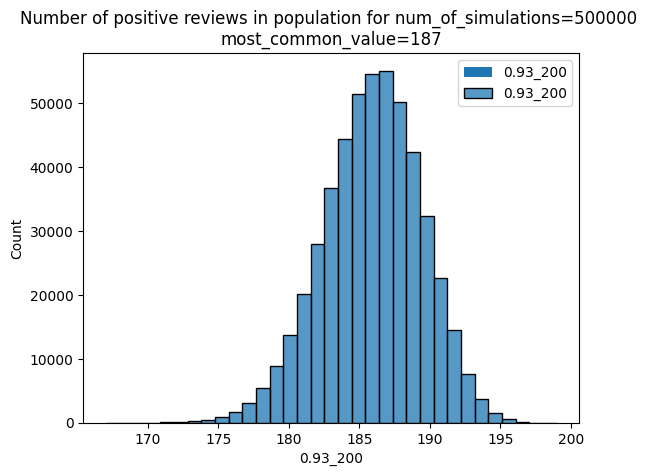

In [59]:
most_common_values_for_experiment = {}
for num_of_simulations, simulations_dict in experiment.items():
    df = pd.DataFrame.from_dict(simulations_dict)
    most_common_values_dict = {}
    for col in df.columns:
        values, counts = np.unique(df[col], return_counts=True)
        sns.histplot(data=df, x=col, label=col, bins=len(values))
        ind = np.argmax(counts)
        most_common_values_dict[col] = values[ind]
        plt.title(
            f"Number of positive reviews in population for num_of_simulations={num_of_simulations}"
            f" \nmost_common_value={values[ind]}"
        )
        plt.legend()
        plt.show()
    most_common_values_for_experiment[num_of_simulations] = most_common_values_dict

### P(data | s) -> probability of data (set of reviews) given success rate
- P(10 O, 0 X  s=0.95)
- P(48 O, 2 X  s=0.95)
- P(186 O, 14 X  s=0.95)

In [60]:
# Pick highest peak to determine "probability" (we cheat, because we are performing simulation, not strict calculations)
# we count positive reviews in population -> we find which count of positive reviews in population appeared most often 
# (ex. if population is 200 and success rate is 0.93 most common positive review count is 186)...

from collections import defaultdict

probas_from_simulation = defaultdict(dict)
for num_of_simulations, simulation in experiment.items():
    display(f"{'*' * 20}num_of_simulations={num_of_simulations}{'*' * 20}")
    for success_rate_population, most_common_value \
          in most_common_values_for_experiment[num_of_simulations].items():
        population_size = int(success_rate_population.split('_')[1])
        proba_of_tossing_the_most_common_value_of_positive_reviews = sum(
          [
            item == most_common_value 
            for item in simulation[success_rate_population]
          ]
        ) / num_of_simulations
        success_rate = float(success_rate_population.split('_')[0])
        probas_from_simulation[num_of_simulations][success_rate_population] = (
          proba_of_tossing_the_most_common_value_of_positive_reviews,
          most_common_value, 
          f"P({most_common_value} O, {population_size - most_common_value} X | s={success_rate}) = {proba_of_tossing_the_most_common_value_of_positive_reviews}"
        )
    display(f"probas={probas_from_simulation[num_of_simulations]})")

'********************num_of_simulations=50********************'

"probas={'1_10': (1.0, 10, 'P(10 O, 0 X | s=1.0) = 1.0'), '0.95_50': (0.28, 49, 'P(49 O, 1 X | s=0.95) = 0.28'), '0.93_200': (0.2, 185, 'P(185 O, 15 X | s=0.93) = 0.2')})"

'********************num_of_simulations=500********************'

"probas={'1_10': (1.0, 10, 'P(10 O, 0 X | s=1.0) = 1.0'), '0.95_50': (0.256, 48, 'P(48 O, 2 X | s=0.95) = 0.256'), '0.93_200': (0.118, 187, 'P(187 O, 13 X | s=0.93) = 0.118')})"

'********************num_of_simulations=5000********************'

"probas={'1_10': (1.0, 10, 'P(10 O, 0 X | s=1.0) = 1.0'), '0.95_50': (0.2624, 48, 'P(48 O, 2 X | s=0.95) = 0.2624'), '0.93_200': (0.1096, 185, 'P(185 O, 15 X | s=0.93) = 0.1096')})"

'********************num_of_simulations=50000********************'

"probas={'1_10': (1.0, 10, 'P(10 O, 0 X | s=1.0) = 1.0'), '0.95_50': (0.26088, 48, 'P(48 O, 2 X | s=0.95) = 0.26088'), '0.93_200': (0.1082, 187, 'P(187 O, 13 X | s=0.93) = 0.1082')})"

'********************num_of_simulations=500000********************'

"probas={'1_10': (1.0, 10, 'P(10 O, 0 X | s=1.0) = 1.0'), '0.95_50': (0.261222, 48, 'P(48 O, 2 X | s=0.95) = 0.261222'), '0.93_200': (0.110056, 187, 'P(187 O, 13 X | s=0.93) = 0.110056')})"

In [61]:
import math


# The probability of getting exactly k successes (each have probability p, and failure probability value of (1-p) ) in n independent Bernoulli trials is given by the probability mass function: 
# (n k) * p^k * (1 - p)^(n-k)    -> https://en.wikipedia.org/wiki/Binomial_distribution
# so its a kind of "drzewko do rozwiązywania prawdopodobieństwa" (tzw. twierdzenie o prawdopodobieństwwie całkowitym)
# (n k) gives number of combinations of sequences of O and X for our review trial
# p is our parameter to change
# we calculate probabilities for k successes given success rate=p and check, which value of p emerges the in highest probability peak in plot of probabilities for k in <1, 50> (y-axis are probabilities, x-axis are number of successes (k) )
# BUT 48 | 2 will be also the most common configuration for other success rates that are close to 0.95, for ex. 0.945, 0.955, 0.96 and all between of course...
# so if success rate on website will be 0.96 also 48 | 2 will be the most common configuration
# Our interest is to check case when success rate is 0.95 (because it is shown on website)


def get_binomial_proba(n, k, p):
    num_of_combinations = math.factorial(n)  / (math.factorial(k) * math.factorial(n - k))
    return num_of_combinations * p ** k * (1 - p) ** (n-k)


In [62]:
probas_from_formula = defaultdict(dict)
for success_rate_population, most_common_value \
        in true_most_common_values_for_experiment.items():
    num_of_positive_reviews = k = most_common_value
    population_size = n = int(success_rate_population.split('_')[1])
    success_rate = p = float(success_rate_population.split('_')[0])
    proba_of_tossing_the_most_common_value_of_positive_reviews = get_binomial_proba(n, k, p)
    probas_from_formula[num_of_simulations][success_rate_population] = (
        proba_of_tossing_the_most_common_value_of_positive_reviews,
        most_common_value, 
        f"P({most_common_value} O, {population_size - most_common_value} X | s={success_rate}) = {proba_of_tossing_the_most_common_value_of_positive_reviews}"
    )
    # "Proba counted as most_common_value_of_positive_counts_in_population / population_size:  ???????
    # probas[num_of_simulations][success_rate_population] = most_common_value / population_size ?????
display(f"probas={probas_from_formula[num_of_simulations]})")

"probas={'1_10': (1.0, 10, 'P(10 O, 0 X | s=1.0) = 1.0'), '0.95_50': (0.2611013703988193, 48, 'P(48 O, 2 X | s=0.95) = 0.2611013703988193'), '0.93_200': (0.10931446758057148, 187, 'P(187 O, 13 X | s=0.93) = 0.10931446758057148')})"

Text(0, 0.5, 'Probability of having set of reviews in population\n with most_common_values_for_experiment')

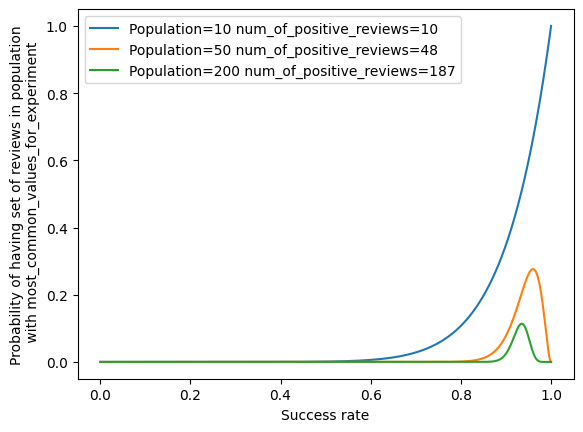

In [63]:
# Plot P( O, X | s) as a function of s

num = 1000
s_values = np.linspace(0, num, num=num) / num

for n, k in zip(num_of_reviews_from_website, true_most_common_values_for_experiment.values()):
    proba_values = []
    for s in s_values:
        proba_values.append(get_binomial_proba(n, k, p=s))
    sns.lineplot(x=s_values, y=proba_values, label=f"Population={n} num_of_positive_reviews={k}")
plt.xlabel("Success rate")
plt.ylabel("?????'Probability' of having set of reviews in population\n with most_common_values_for_experiment")